# 📊 Exploratory Data Analysis in Python — Handling Missing Values

## 1. Why Missing Data Matters
- Missing data can distort **distributions** and **summary statistics**.
- Example:
  - If the tallest (older) students' heights are missing, the **sample mean height** will be lower than the **true population mean**.
  - This makes the dataset **unrepresentative**, leading to **wrong conclusions** (e.g., assuming students are shorter than they really are).

**Key Idea**: Handling missing data is essential to avoid biased or misleading insights.
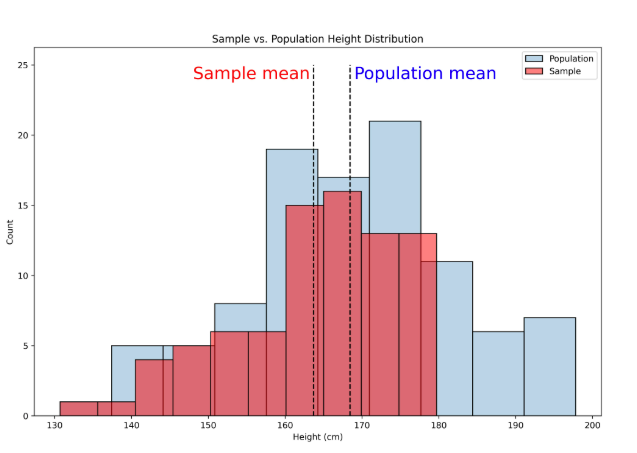

---

## 2. Dataset Context
- Dataset: Salaries of **data professionals**.
- Columns include:
  - `Working_Year`
  - `Designation`
  - `Experience`
  - `Employment_Status`
  - `Employee_Location`
  - `Company_Size`
  - `Remote_Working_Ratio`
  - `Salary_USD`

**Impact of Missing Data**:  
Comparing full vs. incomplete datasets:
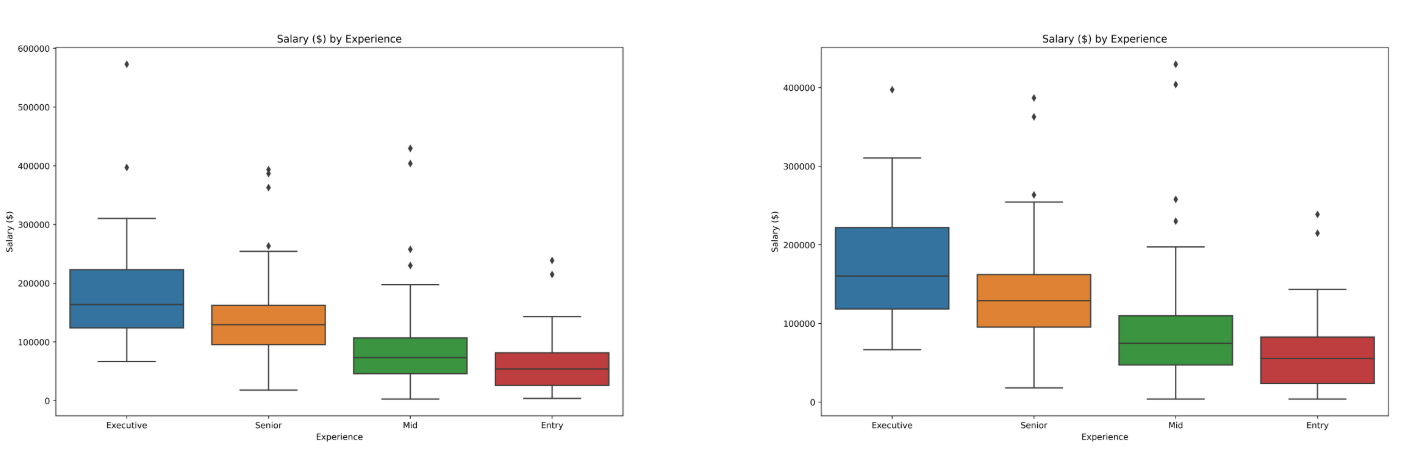
- Missing values caused the **maximum salary** to appear **$150,000 lower**.

---

## 3. Checking for Missing Values
We use Pandas to check missing values.

```python
salaries.isna().sum()
````

**Explanation**:

* `.isna()` → marks missing entries as `True`.
* `.sum()` → counts `True` values per column.
* This tells us **how many values are missing** in each column.

**Output Example**:

```
Working_Year             12
Designation              10
Experience               18
Employment_Status        22
Employee_Location        15
Company_Size             20
Remote_Working_Ratio     17
Salary_USD               60
```

👉 All columns contain missing values, with `Salary_USD` missing the most (60).

---

## 4. Strategy for Handling Missing Data

* **If missing ≤ 5% of data** → Drop rows.
* **If more missing** → Impute with summary statistics:

  * **Mode** (most frequent value) for categorical variables.
  * **Median** or **Mean** for numerical variables.
* **Imputation by subgroup** → Different groups may need different values (e.g., median salary differs by experience).

---

## 5. Dropping Missing Values (≤ 5%)

### Step 1: Set a threshold

```python
threshold = len(salaries) * 0.05
print(threshold)
```

**Explanation**:

* `len(salaries)` → total rows in the dataset.
* Multiply by `0.05` → 5% cutoff.
* Missing values ≤ this number can be safely dropped.

**Output**:

```
30
```

---

### Step 2: Find columns with missing ≤ threshold

```python
cols_to_drop = salaries.columns[salaries.isna().sum() <= threshold]
print(cols_to_drop)
```

**Explanation**:

* `salaries.isna().sum()` → count missing per column.
* `<= threshold` → select columns with fewer than or equal to 30 missing values.
* Store these in `cols_to_drop`.

**Output**:

```
Index(['Working_Year', 'Designation', 'Employee_Location',
       'Remote_Working_Ratio'],
      dtype='object')
```

---

### Step 3: Drop rows with missing values in those columns

```python
salaries.dropna(subset=cols_to_drop, inplace=True)
```

**Explanation**:

* `.dropna(subset=...)` → removes rows with missing values in specified columns.
* `inplace=True` → updates the original DataFrame.

---

## 6. Imputing with Summary Statistics

### Step 1: Find columns still missing

```python
cols_with_missing_values = salaries.columns[salaries.isna().sum() > 0]
print(cols_with_missing_values)
```

**Output**:

```
Index(['Experience', 'Employment_Status', 'Company_Size', 'Salary_USD'],
      dtype='object')
```

---

### Step 2: Fill missing categorical values with Mode

```python
for col in cols_with_missing_values[:-1]:
    salaries[col].fillna(salaries[col].mode()[0], inplace=True)
```

**Explanation**:

* Loop through all but the last column (`Salary_USD`).
* `.mode()[0]` → finds the most frequent value.
* `.fillna(..., inplace=True)` → replaces missing values with that mode.

---

## 7. Checking Remaining Missing Values

```python
print(salaries.isna().sum())
```

**Output**:

```
Working_Year             0
Designation              0
Experience               0
Employment_Status        0
Employee_Location        0
Company_Size             0
Remote_Working_Ratio     0
Salary_USD              41
```

👉 Now only `Salary_USD` has missing values (reduced from 60 → 41).

---

## 8. Imputing by Subgroup (Salary by Experience Level)

### Step 1: Calculate median salaries per experience group

```python
salaries_dict = salaries.groupby("Experience")["Salary_USD"].median().to_dict()
print(salaries_dict)
```

**Explanation**:

* `.groupby("Experience")` → group salaries by experience level.
* `["Salary_USD"].median()` → compute median salary in each group.
* `.to_dict()` → convert result into a dictionary.

**Output**:

```
{'Entry': 55380.0, 'Executive': 135439.0, 'Mid': 74173.5, 'Senior': 128903.0}
```

👉 Different groups have different typical salaries.

---

### Step 2: Fill missing Salary values with group medians

```python
salaries["Salary_USD"] = salaries["Salary_USD"].fillna(
    salaries["Experience"].map(salaries_dict)
)
```

**Explanation**:

* `salaries["Experience"].map(salaries_dict)` → replaces experience levels with their median salaries.
* `.fillna(...)` → uses these values to impute missing salaries.

---

## 9. Final Check — No Missing Values

```python
print(salaries.isna().sum())
```

**Output**:

```
Working_Year            0
Designation             0
Experience              0
Employment_Status       0
Employee_Location       0
Company_Size            0
Remote_Working_Ratio    0
Salary_USD              0
dtype: int64
```

✅ Now the dataset has **no missing values**.

---

## 10. Summary of Steps

1. **Checked missing values** with `.isna().sum()`.
2. **Set threshold (5%)** → 30 missing values max for dropping.
3. **Dropped rows** where fewer values were missing.
4. **Imputed categorical variables** with **mode**.
5. **Imputed Salary by subgroups** using **median salary per experience level**.
6. ✅ **Final dataset is complete and ready for analysis.**

---

```


### Exercise
Dealing with missing data
It is important to deal with missing data before starting your analysis.

One approach is to drop missing values if they account for a small proportion, typically five percent, of your data.

Working with a dataset on plane ticket prices, stored as a pandas DataFrame called planes, you'll need to count the number of missing values across all columns, calculate five percent of all values, use this threshold to remove observations, and check how many missing values remain in the dataset.

Instructions 1/3

Print the number of missing values in each column of the DataFrame.
```python
# Count the number of missing values in each column
print(planes.isna().sum())

<script.py> output:
    Airline            427
    Date_of_Journey    322
    Source             187
    Destination        347
    Route              256
    Dep_Time           260
    Arrival_Time       194
    Duration           214
    Total_Stops        212
    Additional_Info    589
    Price              616
    dtype: int64

```
2. Calculate how many observations five percent of the planes DataFrame is equal to.

```python
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05
```
3. Create cols_to_drop by applying boolean indexing to columns of the DataFrame with missing values less than or equal to the threshold.
- Use this filter to remove missing values and save the updated DataFrame.
```python
# Count the number of missing values in each column
print(planes.isna().sum())

# Find the five percent threshold
threshold = len(planes) * 0.05

# Create a filter
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
planes.dropna(subset=cols_to_drop, inplace=True)

print(planes.isna().sum())

Before

 Airline            427
Date_of_Journey    322
Source             187
Destination        347
Route              256
Dep_Time           260
Arrival_Time       194
Duration           214
Total_Stops        212
Additional_Info    589
Price              616
dtype: int64


After

 Airline              0
Date_of_Journey      0
Source               0
Destination          0
Route                0
Dep_Time             0
Arrival_Time         0
Duration             0
Total_Stops          0
Additional_Info    300
Price              368
dtype: int64

```

### Exercise
Strategies for remaining missing data
The five percent rule has worked nicely for your planes dataset, eliminating missing values from nine out of 11 columns!

Now, you need to decide what to do with the "Additional_Info" and "Price" columns, which are missing 300 and 368 values respectively.

You'll first take a look at what "Additional_Info" contains, then visualize the price of plane tickets by different airlines.

The following imports have been made for you:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Instructions 1/3

Print the values and frequencies of "Additional_Info".

```python
# Check the values of the Additional_Info column
print(planes['Additional_Info'].value_counts())

<script.py> output:
    Additional_Info
    No info                         6399
    In-flight meal not included     1525
    No check-in baggage included     258
    1 Long layover                    14
    Change airports                    7
    No Info                            2
    Business class                     1
    Red-eye flight                     1
    2 Long layover                     1
    Name: count, dtype: int64
```
2. Create a boxplot of "Price" versus "Airline".
```python
# Check the values of the Additional_Info column
print(planes["Additional_Info"].value_counts())

# Create a box plot of Price by Airline
sns.boxplot(data=planes, x='Airline', y='Price')

plt.show()
```
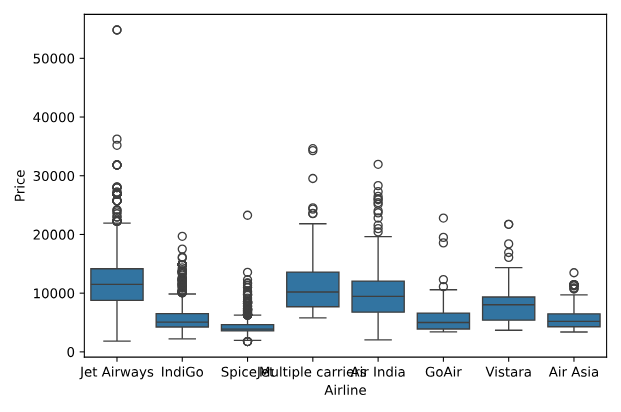


Question
How should you deal with the missing values in "Additional_Info" and "Price"?
Possible answersd


Remove the "Additional_Info" column and impute the mean for missing values of "Price".

Remove "No info" values from "Additional_Info" and impute the median for missing values of "Price".

Remove the "Additional_Info" column and impute the mean by "Airline" for missing values of "Price".

Remove the "Additional_Info" column and impute the median by "Airline" for missing values of "Price".



Imputing missing plane prices
Now there's just one column with missing values left!

You've removed the "Additional_Info" column from planes—the last step is to impute the missing data in the "Price" column of the dataset.

As a reminder, you generated this boxplot, which suggested that imputing the median price based on the "Airline" is a solid approach!

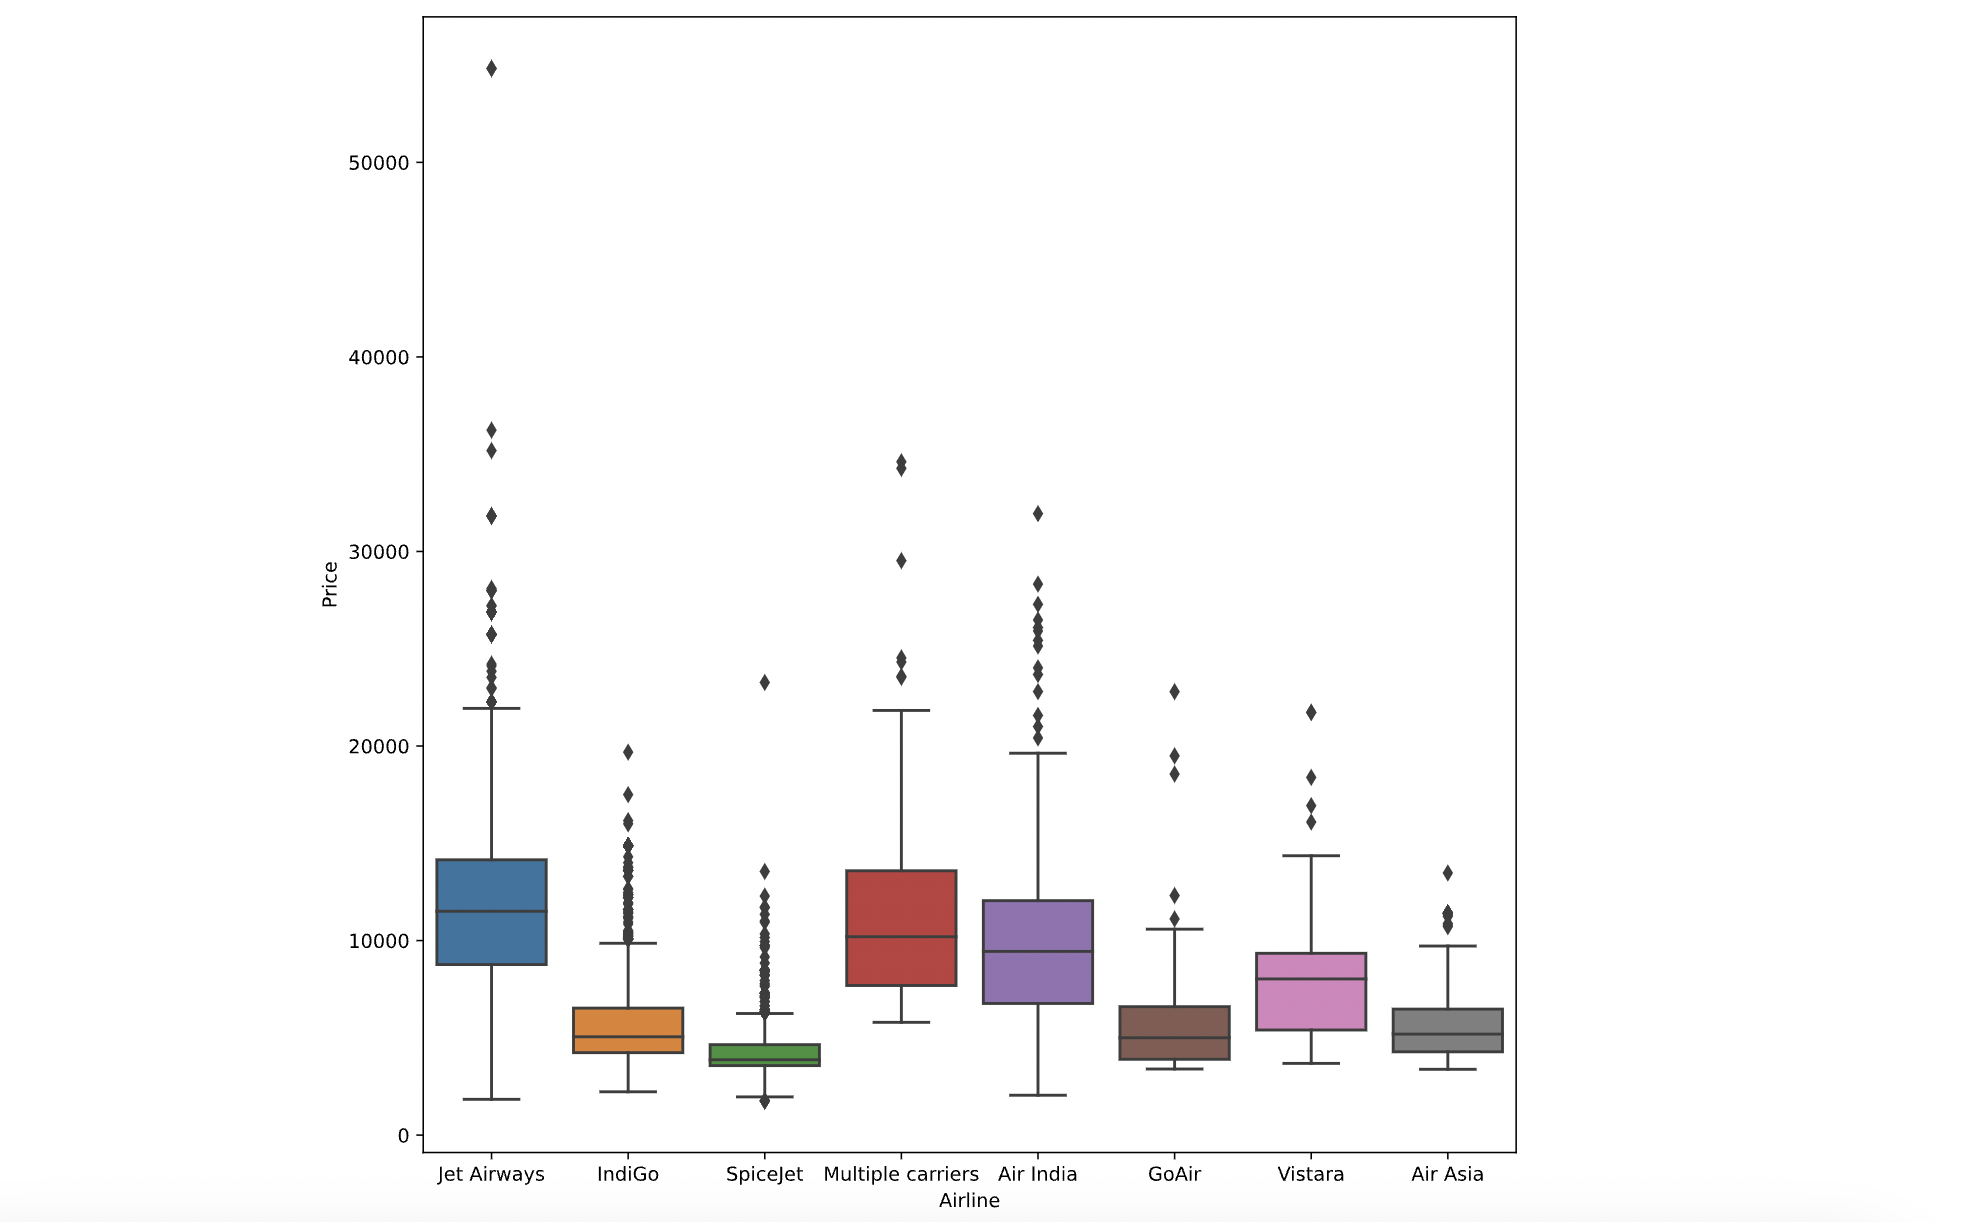

Group planes by airline and calculate the median price.

```python
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

<script.py> output:
    Airline
    Air Asia              5192.0
    Air India             9443.0
    GoAir                 5003.5
    IndiGo                5054.0
    Jet Airways          11507.0
    Multiple carriers    10197.0
    SpiceJet              3873.0
    Vistara               8028.0
    Name: Price, dtype: float64
```
2. Convert the grouped median prices to a dictionary.

```python
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()
```
3. Conditionally impute missing values for "Price" by mapping values in the "Airline" column based on prices_dict.
Check for remaining missing values.

```python
# Calculate median plane ticket prices by Airline
airline_prices = planes.groupby("Airline")["Price"].median()

print(airline_prices)

# Convert to a dictionary
prices_dict = airline_prices.to_dict()

# Map the dictionary to missing values of Price by Airline
planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
print(planes.isna().sum())

<script.py> output:
    Airline
    Air Asia              5192.0
    Air India             9443.0
    GoAir                 5003.5
    IndiGo                5054.0
    Jet Airways          11507.0
    Multiple carriers    10197.0
    SpiceJet              3873.0
    Vistara               8028.0
    Name: Price, dtype: float64
    Airline            0
    Date_of_Journey    0
    Source             0
    Destination        0
    Route              0
    Dep_Time           0
    Arrival_Time       0
    Duration           0
    Total_Stops        0
    Price              0
    dtype: int64
In [2]:

```

# 📝 Exploratory Data Analysis in Python – Creating and Analyzing Categorical Data

---

## 1. Converting and Analyzing Categorical Data
- We often need to **analyze categorical columns** (non-numeric data).
- In this case, the focus is on the **`Designation`** column of the `salaries` DataFrame.

---

## 2. Previewing the Data
We can filter only non-numeric columns and preview them.

```python
# Select non-numeric columns
print(salaries.select_dtypes(include="object").head())
````

**Explanation:**

* `select_dtypes(include="object")`: selects only string/object columns.
* `.head()`: shows the first 5 rows.
* This helps us quickly review textual/categorical data.

**Output (sample):**
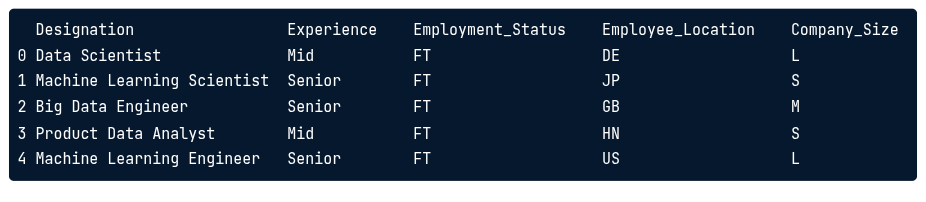

**Insight:**
We see columns like `Designation`, `Experience`, `Employment_Status`, and `Company_Size`.

---

## 3. Exploring Job Titles

* `salaries["Designation"].value_counts()` → frequency of job titles.
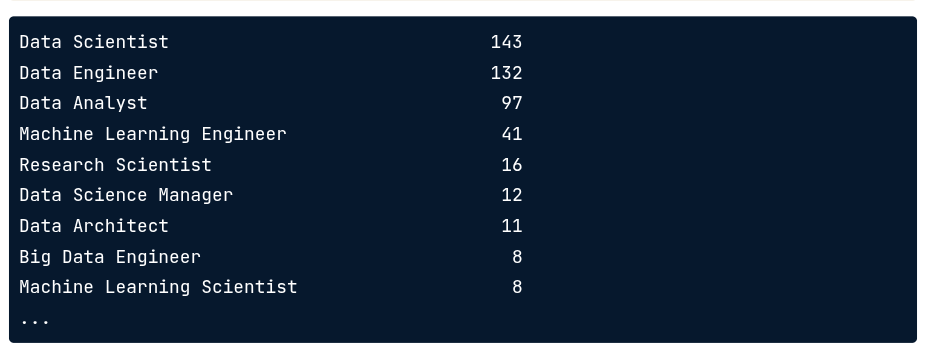
* There are **many unique job titles**, but some appear rarely.

```python
print(salaries["Designation"].nunique())
```

**Output:**

```
50
```

**Explanation:**

* `.nunique()` counts unique job titles.
* There are **50 distinct job titles**.

**Observation:**

* Some job titles appear frequently, e.g., *Data Scientist*.
* Others, like *Research Scientist*, appear fewer than 20 times.

---

## 4. Extracting Values with `.str.contains`
The current format of the data limits our ability to generate insights. We can use the `pandas.Series.str.contains()` method, which allows us to search a column for a specific string or multiple strings
We can search for substrings inside job titles.

```python
mask = salaries["Designation"].str.contains("Scientist")
print(mask.head())
```

**Explanation:**

* `.str.contains("Scientist")`: returns True if “Scientist” appears in `Designation`.
* Useful for identifying subsets of roles.

**Output:**

```
0     True
1    False
2    False
3     True
4    False
Name: Designation, dtype: bool
```

**Significance:**
We now know which rows correspond to job titles containing `"Scientist"`.

---

## 5. Finding Multiple Phrases

We can use regex with `|` (pipe) for **OR conditions**:

```python
mask = salaries["Designation"].str.contains("Machine Learning|AI")
print(mask.head())
```

**Explanation:**

* `"Machine Learning|AI"` → matches if job title has either phrase.
* Returns Boolean values.

**Output (sample):**

```
0    False
1     True
2    False
3    False
4    False
```

**Note:**
Avoid spaces around `|`, otherwise it will look for space characters.

---

## 6. Filtering by Start of String

Use `^` to match at the beginning.

```python
mask = salaries["Designation"].str.contains("^Data")
print(salaries[mask].head())
```

**Explanation:**

* `^Data`: matches any designation **starting with "Data"**.
* Example matches: *Data Scientist*, *Data Analyst*.

**Output (sample):**

```
       Designation  Experience Employment_Status Company_Size
0   Data Scientist          5          Full-Time       Medium
2    Data Analyst          2          Contract        Small
```

---

## 7. Defining Categories of Job Titles

We create **categories** for job roles (Data Science, Analytics, Engineering, etc.).

```python
# Define job categories
job_categories = [
    "Data Science",
    "Data Analytics",
    "Data Engineering",
    "Machine Learning",
    "Managerial",
    "Consultant"
]

# Define search phrases for each category
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|Big Data"
ml_engineer   = "Machine Learning|ML Scientist"
manager       = "Manager|Lead"
consultant    = "Consultant"


# Define conditions for each category
conditions = [
    salaries["Designation"].str.contains(data_science),
    salaries["Designation"].str.contains(data_analyst),
    salaries["Designation"].str.contains(data_engineer),
    salaries["Designation"].str.contains(ml_engineer),
    salaries["Designation"].str.contains(manager),
    salaries["Designation"].str.contains(consultant)
]
```

**Explanation:**

* Each condition checks for job titles matching relevant keywords.
* `conditions` will be used to assign categories.

---

## 8. Creating the `Job_Category` Column

We assign categories using **`np.select`**.

```python
import numpy as np

salaries["Job_Category"] = np.select(
    conditions,
    job_categories,
    default="Other"
)
```

**Line-by-line:**

* `np.select(conditions, job_categories, default="Other")`:

  * Takes `conditions` list (Boolean masks).
  * Assigns corresponding `job_categories`.
  * If none match → assigns `"Other"`.

---

## 9. Previewing Job Categories

```python
print(salaries[["Designation", "Job_Category"]].head())
```

**Output:**

```
                  Designation        Job_Category
0              Data Scientist       Data Science
1  Machine Learning Scientist  Machine Learning
2           Big Data Engineer  Data Engineering
3        Product Data Analyst   Data Analytics
4   Machine Learning Engineer  Machine Learning
```

**Explanation:**

* Our new column `Job_Category` successfully groups job titles into broader roles.

---

## 10. Visualizing Job Category Frequency

We can plot the counts of each category.

```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=salaries, x="Job_Category")
plt.show()
```
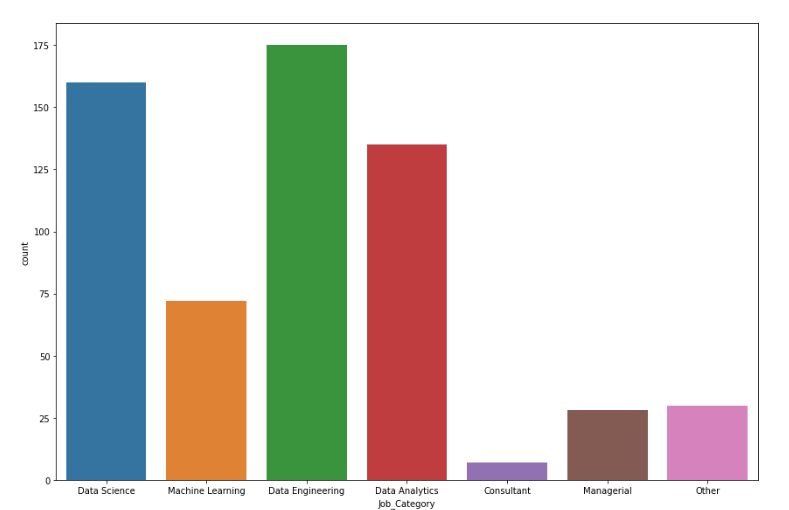
**Explanation:**

* `sns.countplot`: counts frequency of categories in `Job_Category`.
* `plt.show()`: displays the bar plot.

**Output (visual):**
A bar chart showing categories like:

* Data Science → High frequency
* Data Analytics → Moderate
* Data Engineering → Moderate
* Machine Learning → Moderate
* Other → Low frequency

**Insight:**
Most roles fall under **Data Science, Analytics, and Engineering**.
The `"Other"` category is small → our categorization captures the majority well.

---

## ✅ Key Takeaways

* `.str.contains()` is powerful for filtering and categorizing text data.
* `np.select()` is useful for assigning new categorical columns based on conditions.
* Creating a categorical column like `Job_Category` makes analysis and visualization easier.
* Visualization confirms our categories captured most job titles.

---

```
```


### Exercise
Finding the number of unique values
You would like to practice some of the categorical data manipulation and analysis skills that you've just seen. To help identify which data could be reformatted to extract value, you are going to find out which non-numeric columns in the planes dataset have a large number of unique values.

pandas has been imported for you as pd, and the dataset has been stored as planes.

Instructions

Filter planes for columns that are of "object" data type.
Loop through the columns in the dataset.
Add the column iterator to the print statement, then call the function to return the number of unique values in the column.
```python
# Filter the DataFrame for object columns
non_numeric = planes.select_dtypes(include="object")

# Loop through columns
for i in non_numeric.columns:
  
  # Print the number of unique values
  print(f"Number of unique values in {i} column: ", non_numeric[i].nunique())

<script.py> output:
    Number of unique values in Airline column:  8
    Number of unique values in Date_of_Journey column:  44
    Number of unique values in Source column:  5
    Number of unique values in Destination column:  6
    Number of unique values in Route column:  122
    Number of unique values in Dep_Time column:  218
    Number of unique values in Duration column:  362
    Number of unique values in Total_Stops column:  5
    Number of unique values in Additional_Info column:  9
In [1]:


```

### Exercise
Flight duration categories
As you saw, there are 362 unique values in the "Duration" column of planes. Calling planes["Duration"].head(), we see the following values:

0        19h
1     5h 25m
2     4h 45m
3     2h 25m
4    15h 30m
Name: Duration, dtype: object

Looks like this won't be simple to convert to numbers. However, you could categorize flights by duration and examine the frequency of different flight lengths!

You'll create a "Duration_Category" column in the planes DataFrame. Before you can do this you'll need to create a list of the values you would like to insert into the DataFrame, followed by the existing values that these should be created from.

Instructions 1/2

Create a list of categories containing "Short-haul", "Medium", and "Long-haul".
```python
# Create a list of categories
flight_categories = ['Short-haul',
                     'Medium',
                     'Long-haul']
```
Create short_flights, a string to capture values of "0h", "1h", "2h", "3h", or "4h" taking care to avoid values such as "10h".
Create medium_flights to capture any values between five and nine hours.
Create long_flights to capture any values from 10 hours to 16 hours inclusive.
```python
# Create a list of categories
flight_categories = ["Short-haul", "Medium", "Long-haul"]

# Create short-haul values
short_flights = "^0h|^1h|^2h|^3h|^4h"

# Create medium-haul values
medium_flights = "^5h|^6h|^7h|^8h|^9h"

# Create long-haul values
long_flights = "^10h|^11h|^12h|^13h|^14h|^15h|^16h"

```


### Exercise
Adding duration categories
Now that you've set up the categories and values you want to capture, it's time to build a new column to analyze the frequency of flights by duration!

The variables flight_categories, short_flights, medium_flights, and long_flights that you previously created are available to you.

Additionally, the following packages have been imported: pandas as pd, numpy as np, seaborn as sns, and matplotlib.pyplot as plt.

Instructions

Create conditions, a list containing subsets of planes["Duration"] based on short_flights, medium_flights, and long_flights.
Create the "Duration_Category" column by calling a function that accepts your conditions list and flight_categories, setting values not found to "Extreme duration".
Create a plot showing the count of each category.
```python
# Create conditions for values in flight_categories to be created
conditions = [
    (planes["Duration"].str.contains(short_flights)),
    (planes["Duration"].str.contains(medium_flights)),
    (planes["Duration"].str.contains(long_flights))
]

# Apply the conditions list to the flight_categories
planes["Duration_Category"] = np.select(conditions, 
                                        flight_categories,
                                        default="Extreme duration")

# Plot the counts of each category
sns.countplot(data=planes, x="Duration_Category")
plt.show()

```
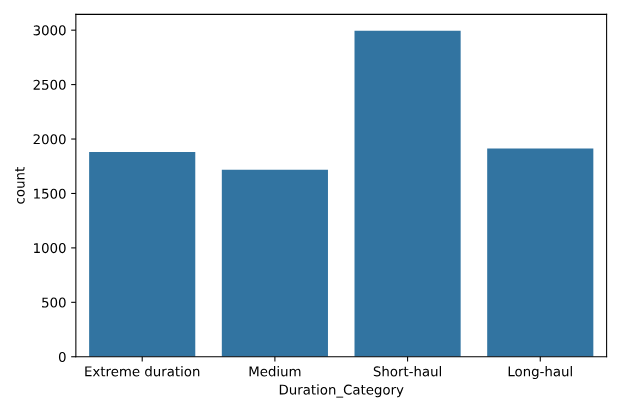

# Working with Numeric Data  
*Exploratory Data Analysis in Python*  

---

## 1. Introduction

- Focus: **Working with numeric data** in a real-world salary dataset.
- Goal: Learn how to **clean**, **convert**, **summarize**, and **analyze** numeric data using `pandas`.

---

## 2. The Original Salaries Dataset

Let's inspect the structure and data types of the original dataset.

### Code

```python
print(salaries.info())
```

### Output

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Working_Year          594 non-null    int64  
 1   Designation           567 non-null    object 
 2   Experience            561 non-null    object 
 3   Employment_Status     563 non-null    object 
 4   Salary_In_Rupees      566 non-null    object 
 5   Employee_Location     554 non-null    object 
 6   Company_Location      570 non-null    object 
 7   Company_Size          535 non-null    object 
 8   Remote_Working_Ratio  571 non-null    float64
dtypes: float64(1), int64(1), object(7)
memory usage: 41.9+ KB
None
```

### Explanation

- **`print(salaries.info())`**:  
    - Prints a summary of the DataFrame.
    - Shows total rows, each column's name, non-null count, and data type.
    - Reveals missing values and that most columns are of type **object** (strings), rather than numeric.
    - `Salary_In_Rupees` is an **object**, not a number, due to formatting.

**Significance:**  
- Before any numeric analysis, we must ensure our numeric columns are *properly formatted* as numbers (not strings).

---

## 3. Previewing the Salary in Rupees

Let's look at the first few entries of the salary column.

### Code

```python
print(salaries["Salary_In_Rupees"].head())
```

### Output

```
0    20,688,070.00
1     8,674,985.00
2     1,591,390.00
3    11,935,425.00
4     5,729,004.00
Name: Salary_In_Rupees, dtype: object
```

### Explanation

- **`salaries["Salary_In_Rupees"].head()`**:  
    - Displays the first five salary records.
    - The numbers use commas as thousand separators and are stored as strings.
    - `dtype: object` confirms these are not numeric.

**Significance:**  
- To perform calculations, we must convert this column from string to numeric.

---

## 4. Converting Strings to Numbers
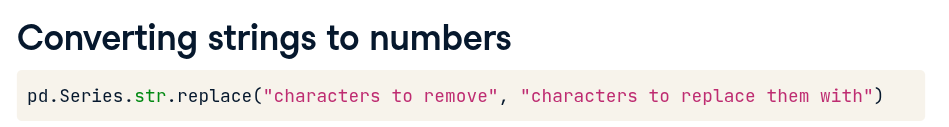
### Steps:
1. **Remove commas** from string values.
2. **Convert the column** to a float data type.
3. **Create a new column** by converting salary to USD.

---

### 4.1 Removing Commas

#### Code

```python
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].str.replace(",", "")
print(salaries["Salary_In_Rupees"].head())
```

#### Output

```
0    20688070.00
1     8674985.00
2     1591390.00
3    11935425.00
4     5729004.00
Name: Salary_In_Rupees, dtype: object
```

#### Explanation

- **Line 1**:  
    - `salaries["Salary_In_Rupees"].str.replace(",", "")`
        - Uses the pandas `.str.replace()` method to remove all commas from the string values.
        - No replacement string is specified (empty string), so commas are just deleted.
    - `salaries["Salary_In_Rupees"] = ...`
        - Updates the column in the DataFrame with the cleaned strings.

- **Line 2**:  
    - Prints the first five cleaned values to verify.

**Purpose:**  
- Removes formatting so the column can be converted to a number.

**Result:**  
- The salary values now appear as plain strings of numbers, with no commas.

---

### 4.2 Converting to Float

#### Code

```python
salaries["Salary_In_Rupees"] = salaries["Salary_In_Rupees"].astype(float)
```

#### Explanation

- **`astype(float)`**:  
    - Converts the cleaned string values to floating-point numbers.
    - This is essential for mathematical operations (e.g., summary statistics, plotting).

**Purpose:**  
- Changes the data type from string (`object`) to numeric (`float`).

**Expected Result:**  
- The `Salary_In_Rupees` column is now numeric.

---

### 4.3 Creating a New Column: Salary in USD

#### Conversion Rate

- **1 Indian Rupee = 0.012 US Dollars**

#### Code

```python
salaries["Salary_USD"] = salaries["Salary_In_Rupees"] * 0.012
```

#### Explanation

- **`salaries["Salary_In_Rupees"] * 0.012`**:  
    - Multiplies each salary (in rupees) by the conversion rate to get the equivalent salary in US dollars.
- **`salaries["Salary_USD"] = ...`**:  
    - Adds a new column to the DataFrame for salaries in USD.

**Purpose:**  
- Enables international comparisons and easier interpretation.

**Result:**  
- The DataFrame now has a new column, `Salary_USD`, with numeric values.

---

## 5. Previewing the New Column

### Code

```python
print(salaries[["Salary_In_Rupees", "Salary_USD"]].head())
```

### Output

```
   Salary_In_Rupees  Salary_USD
0        20688070.0  248256.840
1         8674985.0  104099.820
2         1591390.0   19096.680
3        11935425.0  143225.100
4         5729004.0   68748.048
```

### Explanation

- **`salaries[["Salary_In_Rupees", "Salary_USD"]].head()`**  
    - Shows the first five salaries in both rupees and dollars.

**Significance:**  
- Confirms that the conversion worked.
- Each USD value is exactly 1.2% of the rupees value (as per the conversion rate).

---

## 6. Adding Summary Statistics into a DataFrame

### 6.1 Calculating Mean Salary by Company Size

#### Code

```python
salaries.groupby("Company_Size")["Salary_USD"].mean()
```

#### Output

```
Company_Size
L    111934.432174
M    110706.628527
S     69880.980179
Name: Salary_USD, dtype: float64
```

#### Explanation

- **`salaries.groupby("Company_Size")["Salary_USD"].mean()`**  
    - Groups the data by `Company_Size` (e.g., S = Small, M = Medium, L = Large).
    - Calculates the mean (average) salary in USD for each group.

**Purpose:**  
- Understands how company size affects average salaries.

**Result:**  
- Large and medium companies offer higher average salaries than small ones.

---

### 6.2 Adding Grouped Summary Statistics as New Columns

Sometimes, it's useful to **add summary statistics as new columns**, rather than as separate summary tables.
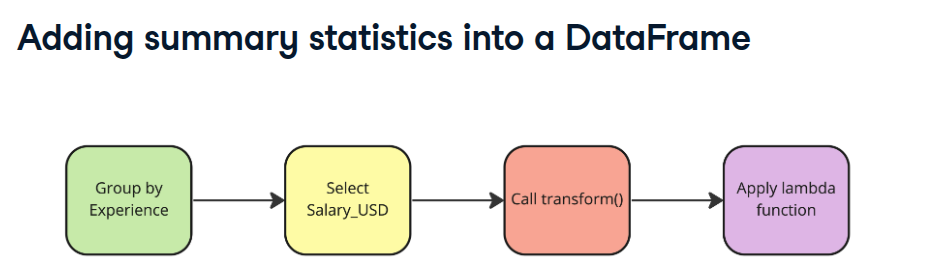

#### Example: Standard Deviation of Salary by Experience Level

##### Step 1: Group by `Experience` and Select `Salary_USD`

##### Step 2: Use `.transform()` with a Lambda Function

#### Code

```python
salaries["std_dev"] = salaries.groupby("Experience")["Salary_USD"].transform(lambda x: x.std())
```

#### Explanation (Line-by-Line)

1. **`salaries.groupby("Experience")`**  
    - Groups rows by the `Experience` column (e.g., SE = Senior, MI = Mid, EN = Entry, EX = Executive).
2. **`["Salary_USD"]`**  
    - Focuses on the `Salary_USD` column within each group.
3. **`.transform(lambda x: x.std())`**  
    - Calculates the standard deviation of salaries within each experience group.
    - `transform` ensures the result aligns with the original DataFrame's row structure (each row gets the standard deviation for its experience group).
4. **`salaries["std_dev"] = ...`**  
    - Adds a new `std_dev` column containing the calculated value for each row.

**Purpose:**  
- Helps to quantify the variability of salaries within each experience level.

---

### 6.3 Checking the New Statistics

#### Code

```python
print(salaries[["Experience", "std_dev"]].value_counts())
```

#### Output

```
Experience  std_dev       
SE          52995.385395     257
MI          63217.397343     197
EN          43367.256303      83
EX          86426.611619      24
dtype: int64
```

#### Explanation

- **`salaries[["Experience", "std_dev"]].value_counts()`**  
    - Counts how many rows have each combination of `Experience` and its associated standard deviation.

**Significance:**  
- Shows the number of employees at each experience level and the variation in salaries for each group.
- Example: Senior-level (SE) has 257 entries, with a salary standard deviation of ~$53,000 USD.
- Executive (EX) has the highest variability.

---

### 6.4 Adding Median Salary by Company Size

#### Code

```python
salaries["median_by_comp_size"] = salaries.groupby("Company_Size")["Salary_USD"].transform(lambda x: x.median())
print(salaries[["Company_Size", "median_by_comp_size"]].head())
```

#### Output

```
  Company_Size  median_by_comp_size
0            S            60833.424
1            M           105914.964
2            S            60833.424
3            L            95483.400
4            L            95483.400
```

#### Explanation

1. **`salaries.groupby("Company_Size")["Salary_USD"]`**  
    - Groups data by company size.
2. **`.transform(lambda x: x.median())`**  
    - Calculates the median salary for each group.
3. **Adds as a new column** for each row, based on its group.
4. **`print(...head())`**  
    - Displays the first five rows to check correct mapping.

**Significance:**  
- Each row now contains the median salary for its company size.
- Quick comparison: Medium-sized companies have the highest median salary.

---

## 7. Summary

- **Numeric Data Preparation:**  
    - Cleaned and converted salary data from strings to floats.
    - Added new columns for analysis (USD conversion, standard deviation, median).

- **Group-wise Analysis:**  
    - Used `groupby` and `transform` to calculate and insert summary statistics into the DataFrame.

- **Key Functions & Methods:**  
    - `.str.replace()`, `.astype()`, `groupby()`, `.mean()`, `.std()`, `.median()`, `.transform()`

- **Insight:**  
    - Data cleaning and transformation are crucial for meaningful numeric analysis in pandas.

---



Exercise
Flight duration
You would like to analyze the duration of flights, but unfortunately, the "Duration" column in the planes DataFrame currently contains string values.

You'll need to clean the column and convert it to the correct data type for analysis. seaborn has been imported as sns.

Instructions 1/4

Print the first five values of the "Duration" column.

```python
# Preview the column
print(planes['Duration'].head())

<script.py> output:
    0                  19.0h
    1     5.416666666666667h
    2                  4.75h
    3    2.4166666666666665h
    4                  15.5h
    Name: Duration, dtype: object

```
2. Remove "h" from the column.
```python
# Preview the column
print(planes["Duration"].head())

# Remove the string character
planes["Duration"] =  planes['Duration'].str.replace('h','')
```
3. Convert the column to float data type.
```python
# Preview the column
print(planes["Duration"].head())

# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "")

# Convert to float data type
planes["Duration"] = planes['Duration'].astype(float)
```
4. Plot a histogram of "Duration" values.
```python
# Preview the column
print(planes["Duration"].head())

# Remove the string character
planes["Duration"] = planes["Duration"].str.replace("h", "")

# Convert to float data type
planes["Duration"] = planes["Duration"].astype(float)

# Plot a histogram
sns.histplot(x='Duration', data=planes)
plt.show()

```
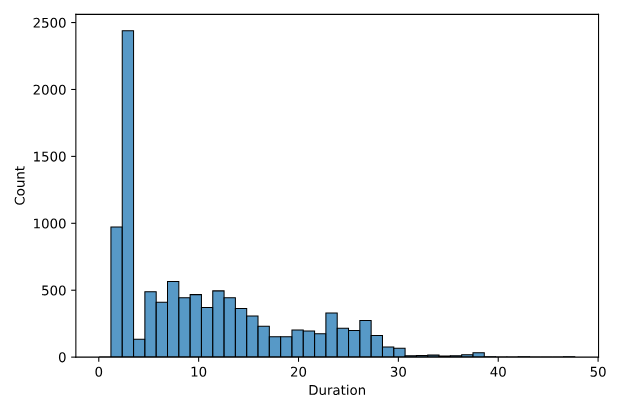




### Exercise
Adding descriptive statistics
Now "Duration" and "Price" both contain numeric values in the planes DataFrame, you would like to calculate summary statistics for them that are conditional on values in other columns.

Instructions 1/3

Add a column to planes containing the standard deviation of "Price" based on "Airline".
```python
# Price standard deviation by Airline
planes["airline_price_st_dev"] = planes.groupby("Airline")["Price"].transform(lambda x: x.std())

print(planes[["Airline", "airline_price_st_dev"]].value_counts())

<script.py> output:
    Airline            airline_price_st_dev
    Jet Airways        4230.749                3685
    IndiGo             2266.754                1981
    Air India          3865.872                1686
    Multiple carriers  3763.675                1148
    SpiceJet           1790.852                 787
    Vistara            2864.268                 455
    Air Asia           2016.739                 309
    GoAir              2790.815                 182
    Name: count, dtype: int64
```
2.Calculate the median for "Duration" by "Airline", storing it as a column called "airline_median_duration"
```python
# Median Duration by Airline
planes["airline_median_duration"] = planes.groupby("Airline")["Duration"].transform(lambda x: x.median())

print(planes[["Airline","airline_median_duration"]].value_counts())

<script.py> output:
    Airline            airline_median_duration
    Jet Airways        13.333                     3685
    IndiGo             2.917                      1981
    Air India          15.917                     1686
    Multiple carriers  10.250                     1148
    SpiceJet           2.500                       787
    Vistara            3.167                       455
    Air Asia           2.833                       309
    GoAir              5.167                       182
    Name: count, dtype: int64
```
3. Find the mean "Price" by "Destination", saving it as a column called "price_destination_mean".
```python
# Mean Price by Destination
planes["price_destination_mean"] = planes.groupby("Destination")["Price"].transform(lambda x: x.mean())

print(planes[["Destination","price_destination_mean"]].value_counts())

<script.py> output:
    Destination  price_destination_mean
    Cochin       10506.993                 4391
    Banglore     9132.225                  2773
    Delhi        5157.794                  1219
    New Delhi    11738.589                  888
    Hyderabad    5025.210                   673
    Kolkata      4801.490                   369
    Name: count, dtype: int64
```
